# Data exploration
## Introduction

There are 40 descriptive features and 1 target variable consisting of 3 classes.

Some features are picked up to record how I explored the dataset.

This file shows the data exploration blow;

- Checking
    - Anomaly values such as NaN and 0
    - Outliers by boxplots
- Visualising
    - Class proportion in the target variable
    - Distribution of descriptive variable
    - Geographical features such as longitude and latitude
    - Correlation between descriptive features


## How to run
1. Download data from [Pump it Up: Data Mining the Water Table](https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/data/)
2. Put the dataset as `./data/train_ft.csv` and `./data/train_label.csv`
3. Run the codes from the beginning

## Output
Running this file generates images in ./img folder and html maps in ./html folder.

## Library

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import squarify
import numpy as np
import folium

## Read initial data

In [2]:
df_ft = pd.read_csv("./data/train_ft.csv")

In [3]:
labels = ['functional','functional needs repair','non functional']

# Basic information

This data consists of 59400 records and 40 features

In [4]:
print(f"# of records: {len(df_ft)}")
print(f"# of features: {len(df_ft.columns)}")

# of records: 59400
# of features: 40


# Check Anomaly values

0, NaN, Unknown are considered as anomaly values.

As the result shows, 25 features out of 40 features contain either anomaly value.

Note: column of `id` does not contain missing values

In [5]:
concats = []
for col_nm, col in df_ft.iteritems():
    chk_target = [np.nan, 0, "unknown", "Unknown"]
    filtered_data = df_ft[col_nm].fillna("NaN").loc[df_ft[col_nm].isin(chk_target)]
    cnts = filtered_data.value_counts()
    if not cnts.empty:
        concats.append(cnts)
print(len(pd.concat(concats, axis=1).T))
pd.concat(concats, axis=1).T

26


,0.0,NaN,Unknown,unknown
id,1.0,NaN,NaN,NaN
amount_tsh,41639.0,NaN,NaN,NaN
funder,NaN,3635.0,4.0,NaN
gps_height,20438.0,NaN,NaN,NaN
installer,NaN,3655.0,3.0,1.0
longitude,1812.0,NaN,NaN,NaN
wpt_name,NaN,NaN,3.0,NaN
num_private,58643.0,NaN,NaN,NaN
subvillage,NaN,371.0,NaN,NaN
district_code,23.0,NaN,NaN,NaN


# Class proportion in target variable

In [6]:
df_label = pd.read_csv("./data/train_label.csv")

Have a look at the first 3 records.

In [7]:
df_label.head(3)

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional


Check the proportion of each class in the target variable.

Over 90% of data belong to either "functional" or "non functional", whereas only 7.3 % were classicied into the middle class as "functional needs repair".

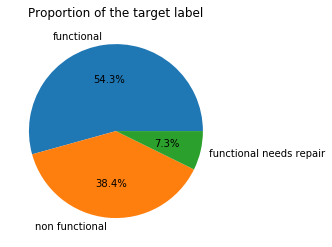

In [8]:
cnt_label = df_label["status_group"].value_counts()
plt.pie(cnt_label.values, labels=cnt_label.index, autopct="%1.1f%%")
plt.title("Proportion of the target label")
plt.show()

# Descriptive variables

## Data preparation

Combine dataframes of features and target into one dataframe.

In [9]:
df = pd.merge(df_ft, df_label, on="id")
df.head(3)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional


### Function preparation

Define functions for plotting.

In [13]:
def output_categorical_values_on_map(df, feature, tiles="Stamen Toner", plt_as_possible=False):
    """
    Plot each categorical value on map
    ----------
    df : pd.dataframe
        dataframe uesd for plotting
    feature: str
        name of the feature for plotting
    tiles: str
        the type of a tile used in the map
    plt_as_possible: boolean
        use all prepared color to plot and stop to plot when consume up all of the colors
    """
    colors = ['#2F4F4F','#708090','#778899','#696969','#A9A9A9','#D3D3D3','#DCDCDC','#B0C4DE','#00008B','#191970','#483D8B','#4B0082','#0000CD','#7B68EE','#4169E1','#6495ED','#008BBB','#4682B4','#1E90FF','#00BFFF','#87CEFA','#87CEEB','#ADD8E6','#00FFFF','#5F9EA0','#20B2AA','#66CDAA','#00CED1','#48D1CC','#40E0D0','#B0E0E6','#AFEEEE','#6B8E23','#556B2F','#006400','#228B22','#2E8B57','#3CB371','#32CD32','#9ACD32','#7FFFD4','#00FA9A','#00FF7F','#7CFC00','#7FFF00','#ADFF2F','#90EE90','#98FB98','#8B008B','#6A5ACD','#8A2BE2','#9400D3','#9932CC','#BA55D3','#9370DB','#8FBC8F','#8B0000','#8B4513','#A52A2A','#B22222','#A0522D','#CD5C5C','#D2691E','#BDB76B','#DC143C','#FF1493','#FF69B4','#FF00FF','#DA70D6','#EE82EE','#DDA0DD','#D8BfD8','#BC8F8F','#C71585','#DB7093','#E9967A','#F08080','#FFA07A','#FFB6C1','#FFC0CB','#FF4500','#FF6347','#FF4F50','#FA8072','#FF8C00','#FFA500','#F4A460','#E6E6FA','#B8860B','#CD853F','#DAA520','#D2B48C','#DEB887','#FFD700','#FFE4E1','#E0FFFF']
    
    feat_uniqs = list(df[feature].unique())
           
    loc_mean = df[["latitude", "longitude"]].mean()
    map = folium.Map(location=[loc_mean[0], loc_mean[1]], zoom_start=8, tiles=tiles)

    for cat_val in feat_uniqs:
        color_ = colors[feat_uniqs.index(cat_val)]
        color_range = {0: color_, 1: color_} # draw a single color

        data_=df.loc[df[feature]==cat_val,["latitude", "longitude"]].values
        HeatMap(data=data_, name=str(cat_val) ,radius=5, blur=3, gradient=color_range, control=True).add_to(map)
        
        if plt_as_possible & (len(colors) - 1== feat_uniqs.index(cat_val)):
            break
    
    folium.LayerControl().add_to(map)
    
    map.save(f"./htmls/{feature}.html")

In [14]:
def plot_correlation_heatmap(df, feature_col, feature_idx):
    """
    Plot heat map showing corrlation
    ----------
    df : pd.dataframe
        dataframe uesd for plotting
    feature_col: str
        name of the feature for plotting
    feature_idx: str
        name of the feature for plotting
    """
    piv = pd.pivot_table(data=df, values="id", columns=feature_col, index=feature_idx, aggfunc=len).fillna(0)
    horizontal_sum = piv.apply(lambda x: sum(x), axis=1)
    sns.heatmap(piv.div(horizontal_sum, axis=0), yticklabels=True,cmap="Reds")
    plt.savefig(f"./img/expl_heatmap_{feature_col}_{feature_idx}.png", bbox_inches="tight")

## Distribution
### amount_tsh
It represents Total static head (amount water available to waterpoint).

According to [the discussion room](https://community.drivendata.org/t/interpreting-amount-tsh/338/3), it is
> The vertical height of a stationary column of liquid produced by a pump, measured from the suction level.

**histogram**

According to the density histogram, this data is highly skewed.

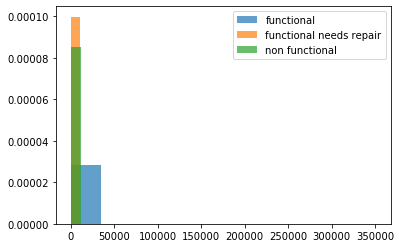

In [19]:
for label in labels:
    df_tmp = df.loc[df["status_group"]==label, "amount_tsh"]
    plt.hist(x=df_tmp, density=True, label=label, alpha=0.7)
plt.legend()
plt.show()

Taking logarithm reveals that its has logarithm normal distribution.

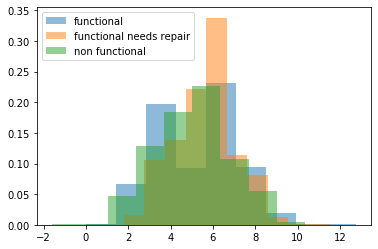

In [20]:
for label in labels:
    df_tmp = np.log(df.loc[~df["amount_tsh"].isin([0])&(df["status_group"]==label), "amount_tsh"])
    plt.hist(x=df_tmp, density=True, label=label, alpha=0.5)
plt.legend()
plt.show()

**Outliers**

Here, [the IQR * 1.5 rule](https://www.purplemath.com/modules/boxwhisk3.htm) is adopted to detect outliers.

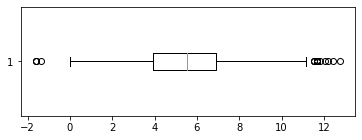

In [21]:
plt.figure(figsize=(6, 2))
bp = plt.boxplot(np.log(df.loc[(~df["amount_tsh"].isin([0])), "amount_tsh"]), vert=False)
plt.show()

Get values of whiskers and extract exact data outside of the whiskers.

In [22]:
whisker_under = bp["whiskers"][0].get_xdata()[1]
whisker_top =  bp["whiskers"][1].get_xdata()[1]

In [23]:
data_ = np.log(df.loc[(~df["amount_tsh"].isin([0])), "amount_tsh"])
print('The number of bottom outliers is {}, the top outliers is {}'.format(len(data_[data_ < whisker_under]), len(data_[data_ > whisker_top])))

The number of bottom outliers is 4, the top outliers is 16


Then, check outliers per class.

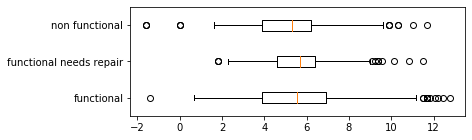

In [145]:
plt.figure(figsize=(6, 2))
data_ = []
for label in labels:
    data_.append(np.log(df.loc[(~df["amount_tsh"].isin([0])) & (df["status_group"] == label), "amount_tsh"]))
bp = plt.boxplot(data_, labels=labels, vert=False)
plt.savefig(f"./img/expl_box_amount_tsh.png", bbox_inches="tight")
plt.show()

In [25]:
for i in range(len(labels)):
    whisker_under = bp["whiskers"][i * 2].get_xdata()[1]
    whisker_top =  bp["whiskers"][1 + i * 2].get_xdata()[1]
    print('[{}]The number of bottom outliers is {}, the top outliers is {}'.format(labels[i],len(data_[i][data_[i] < whisker_under]), len(data_[i][data_[i] > whisker_top])))

[functional]The number of bottom outliers is 1, the top outliers is 14
[functional needs repair]The number of bottom outliers is 3, the top outliers is 9
[non functional]The number of bottom outliers is 6, the top outliers is 7


Although they are detected as outliers, they are very close to whiskers such that they are a part of normal values.

Hence, they are kept as not outliers.

## Longitude and latitude as Geographical features

It is better to geographically analyzing geographical data such as longitude, latitude, gps, region and sub-villege.

Firstly, create a heatmap per class based on location (longitude and latitude) of data point. If a particular area has many functional or non-functional water pumps, k-nearest neighbor algorithm can be considered.

In [37]:
tmp_geo = pd.concat([df.groupby(by="region")["region"].count(),
          df.groupby(by="region")[["longitude","latitude"]].mean()],
         axis=1)
tmp_geo.columns = ["count", "longitude","latitude"]
tmp_geo.head()

,count,longitude,latitude
region,,,
Arusha,3350,36.552713,-3.246455
Dar es Salaam,805,39.215799,-6.909677
Dodoma,2201,36.044171,-5.928734
Iringa,5294,34.895989,-8.907700
Kagera,3316,31.233262,-1.961466


In [38]:
import folium
from folium.plugins import HeatMap

In [39]:
output_categorical_values_on_map(df, "status_group")

By looking at the generated map in ./html folder, the distribution of each status group quite overwrap together.

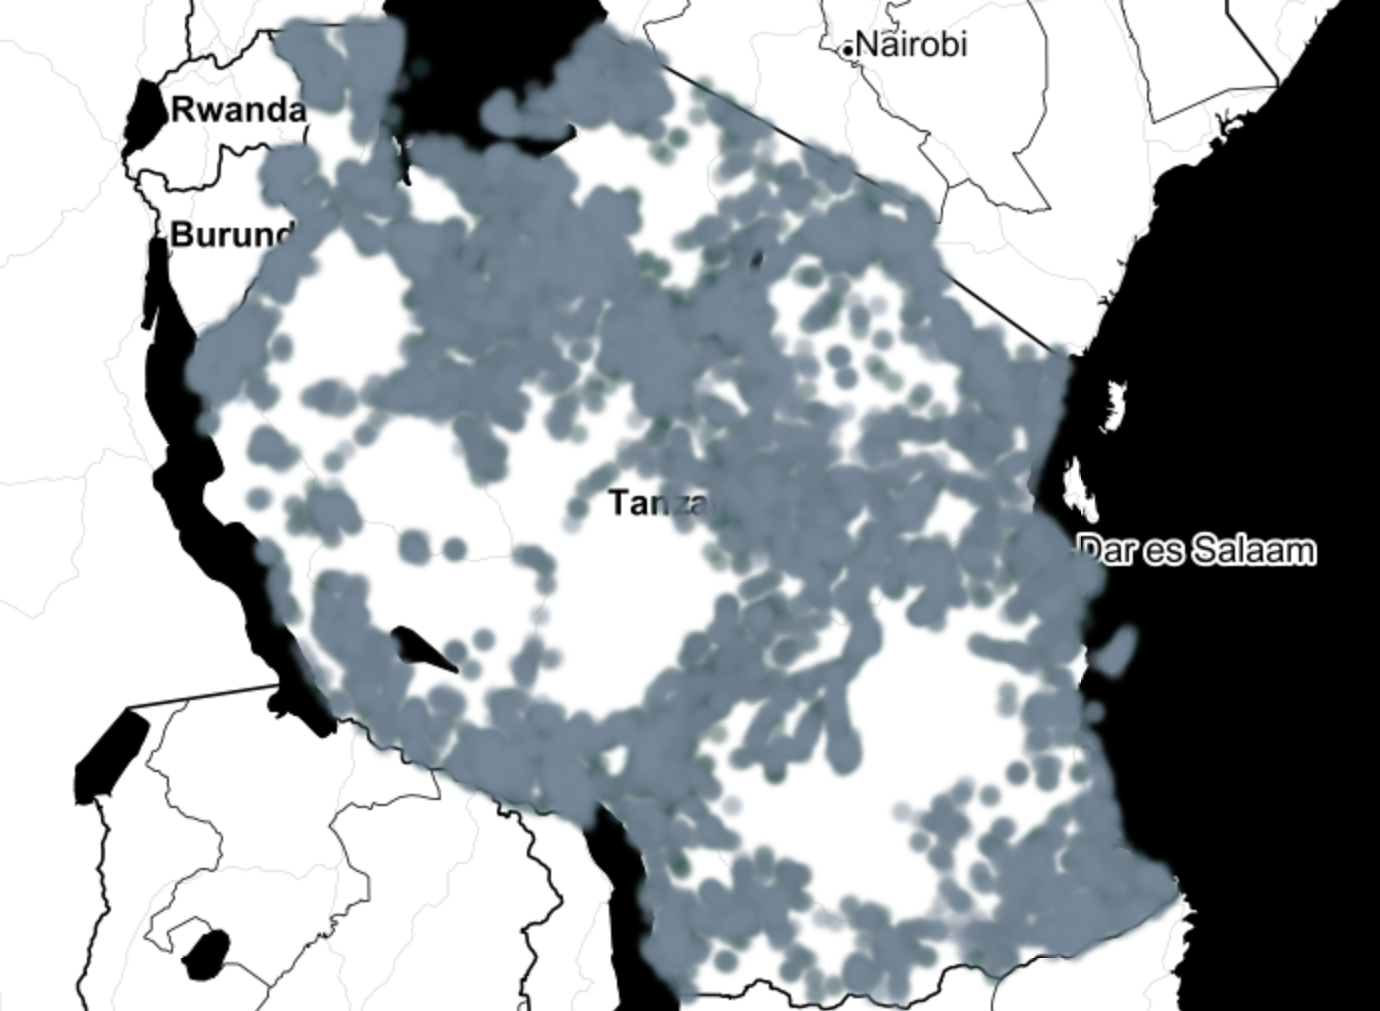

It indicates that geographical location would not contribute to distinguishing the class of the status groups.

**outliers**

By looking at the generated map in the large scale, it is noticed that there is one outlier located in the ocean far from Tanzania.

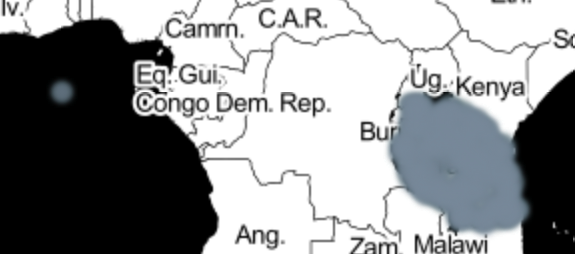

## Correlation between descriptive features
### extraction_type, extraction_type_group and extraction_type_class
They represent the type of extraction the waterpoint uses

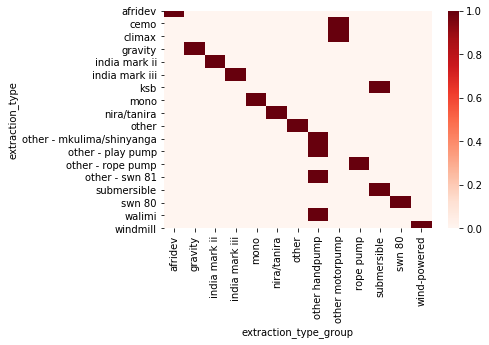

In [109]:
plot_correlation_heatmap(df, "extraction_type_group", "extraction_type")

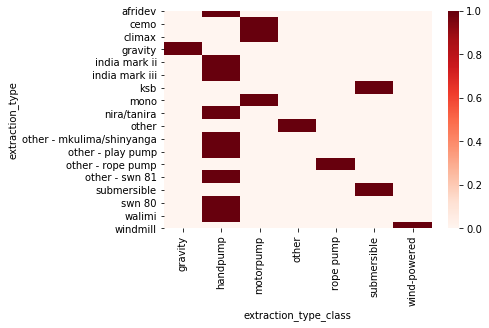

In [110]:
plot_correlation_heatmap(df, "extraction_type_class", "extraction_type")

- extraction_type_class > extraction_type_group > extraction_type
- they are highly correlated, only one of them should be kept
    - personally, consider to keep the biggest group `extraction_type_class`
    - small categorical values result in small dimention, leading to suppressing overfitting